# 데이터 불러오기

In [2]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df=pd.read_csv("/home/piai/바탕화면/1 Big Data 분석 기초/titanic.csv", encoding='euc-kr')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


#### pandas를 호출하고, df라는 이름의 변수에 타이타닉 데이터를 불러와주었습니다. head로 5개만 확인해줍니다.

# 데이터 특성 확인하기

In [3]:
df.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


#### 데이터 속성을 info함수를 사용하여 데이터 속성을 확인하였습니다. 변수별로 int, float, object 등 형태를 파악하였습니다

In [4]:
df.shape

(891, 12)

#### 데이터를 다루기 전 데이터를 확인하는 작업을 우선 시 되어야 합니다. 행과 열의 개수를 알기 위해 shape으로 행과 열 개수를 확인해주었습니다.

In [5]:
df.describe() 

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.758889,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,13.002570,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,22.000000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,30.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


#### 데이터의 기술통계량을 통해 데이터의 분포나 최대값, 최소값, 평균 등을 정보를 확인해줍니다. 데이터 전처리 과정을 하기전 전체 데이터를 파악할 수 있었습니다.

# 결측치 확인

In [6]:
df.isnull().head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,False,False,False,False,False,False,False,False,False,False,True,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,True,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,True,False


#### 결측치가 있는 열을 True로 반환하여 head로 5개열을 확인해보았습니다. 데이터의 결측치를 볼 수 있지만 데이터가 많아 가독성이 떨어집니다.

In [7]:
df.isnull().sum() 

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

#### 결측치가 열별로 몇개가 있는지 편하게 확인해주기 위해 sum을 이용하여 확인해줍니다. 현업에서는 Cabin 데이터가 유의미한 변수가 아니라면 삭제해주는 것이 맞는 판단이라고 생각합니다.  800여개의 데이터 중 687개의 결측치를 대체한다는 것은 데이터 변질의 우려가 있다고 생각합니다. 현재는 연습과정이므로 실습내용에 따라 최빈값 대체를 하고 넘어가겠습니다.
#### Embarked는 승객이 탑승한 곳으로 C,Q,S로 이루어져있고, 뒤에서 최빈값으로 대체 해주겠습니다.

# 이상치 확인하기

<Axes: >

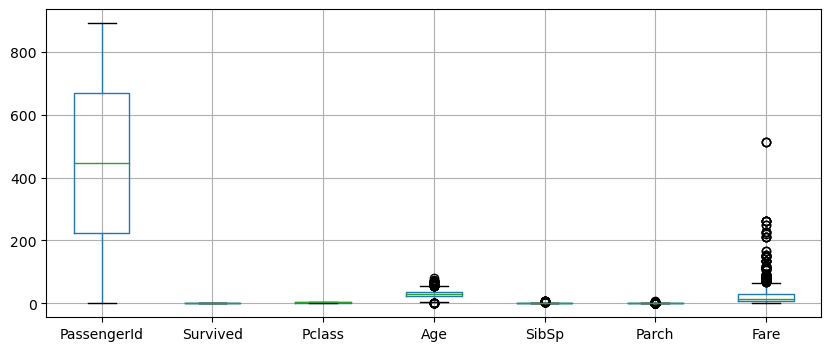

In [8]:
df.boxplot(figsize=(10,4)) 

#### 전체 데이터를 기준으로 boxplot을 그린다면 단위의 차이 때문에 가독성이 매우 떨어집니다. 가독성을 좋게 해주기 위해서 각 변수마다 따로 그려주는 것이 좋습니다. 모두 그려서 상한과 하한에 데이터가 얼마나 분포하는지 육안으로 확인해볼 수 있습니다.

<Axes: >

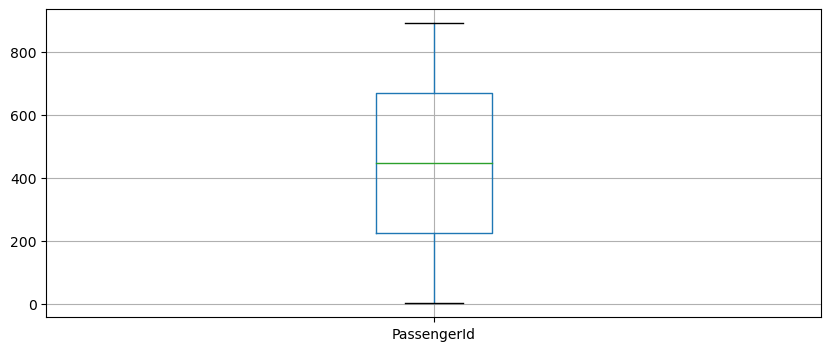

In [61]:
df.boxplot(column=["PassengerId"], figsize=(10,4))

#### PassengerId는 인덱스와 비슷하게 1부터 총 행수까지 값이기때문에 boxplot을 그리는 것은 의미가 없다고 판단되지만 그려보았다.

<Axes: >

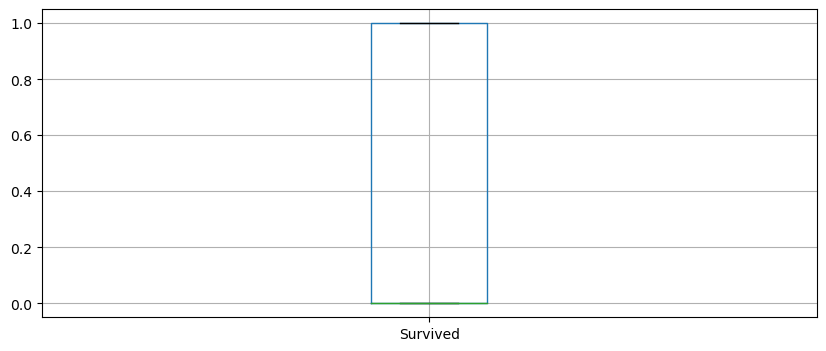

In [62]:
df.boxplot(column=["Survived"], figsize=(10,4))

#### Survived는 0과 1의 목표변수로 라벨링된 것으로 현실로는 boxplot을 그리지 않지만 그려보았다. 0과 1의 값빼고는 없는 것을 알 수 있다.

<Axes: >

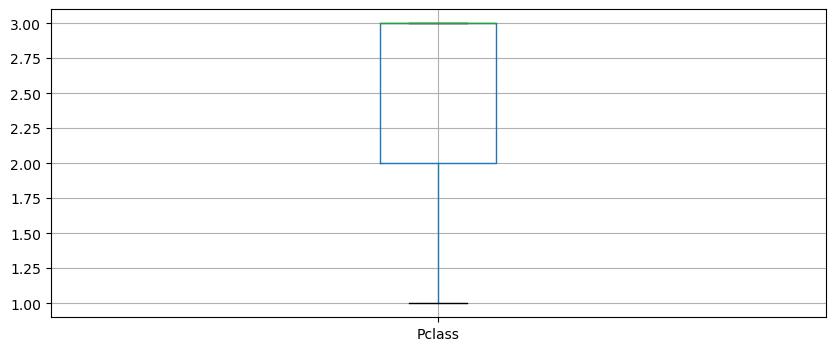

In [63]:
df.boxplot(column=["Pclass"], figsize=(10,4))

#### Pclass는 승객 등급에 따라 1,2,3등석으로  범주형 데이터이다. 범주형 데이터이기 때문에 범주안에 데이터가 전부 존재하는 것을 알 수 있다.

<Axes: >

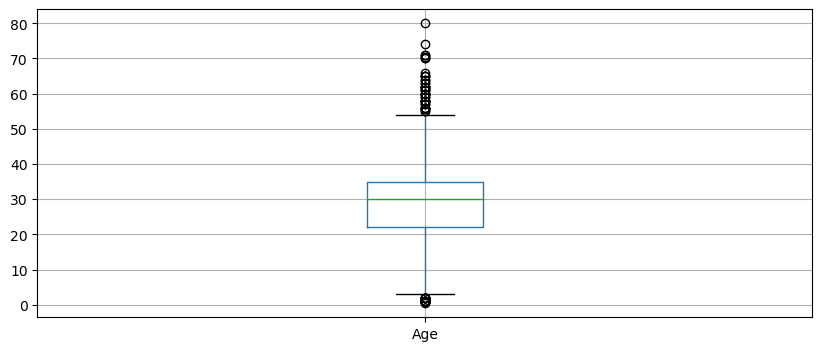

In [64]:
df.boxplot(column=["Age"], figsize=(10,4))

#### 탑승자의 나이를 나타내는 변수인 Age를 boxplot으로 나타낸 것이다.  통계적으로 본다면 boxplot 밖에 있는 이상치가 매우 많지만 , 변수는 나이이므로 이상치로 판단하지 않는다.

<Axes: >

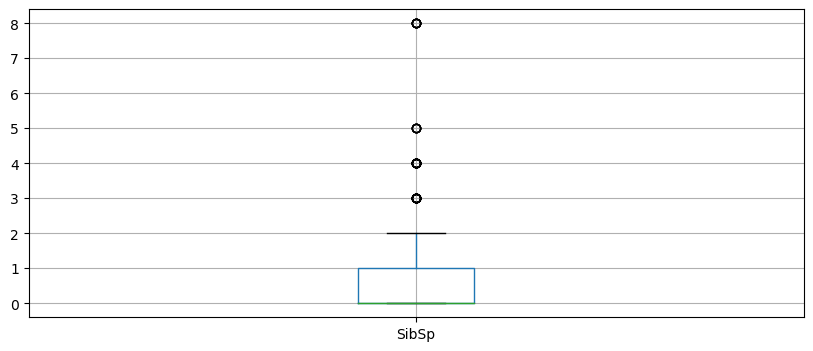

In [8]:
df.boxplot(column=["SibSp"], figsize=(10,4))

<Axes: >

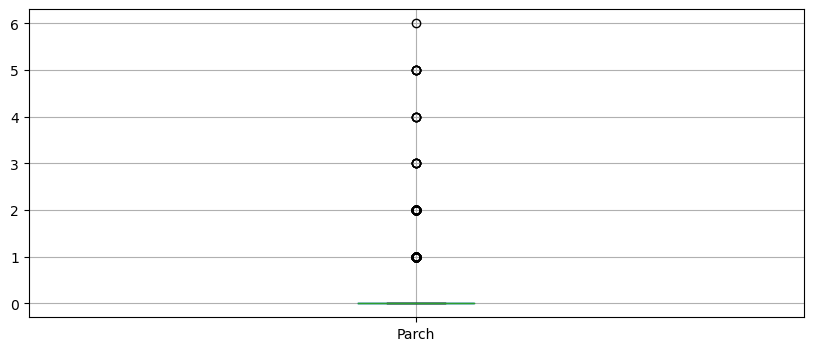

In [5]:
df.boxplot(column=["Parch"], figsize=(10,4))

#### Parch는 함께 탑승한 자녀,부모의 수로 이산적인 값이기 때문에 1~6까지 boxplot에 찍혀있습니다. 1에 가장 찐하게 찍혀있기 때문에 1의 값이 가장 많은 것을 알 수 있습니다. 

<Axes: >

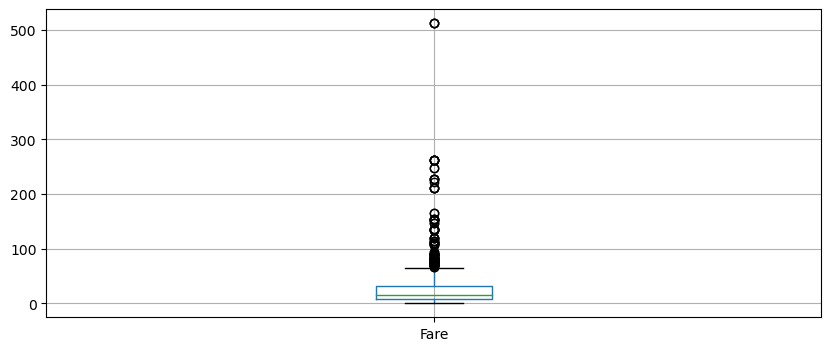

In [3]:
df.boxplot(column=["Fare"], figsize=(10,4))

#### Fare는 티켓 요금으로 boxplot의 상한을 넘는 이상치들이 많이 나타납니다. 하지만 실제로 데이터 수도 적고, 요금을 비싸게 준 사람들은 부유층으로 생존과 관련이 있을지 없을지 모르기 때문에 이상치를 제거하지 않을 것입니다. 만약 변수별로 승급등급인 Pclass와 Fare의 상관관계를 보고 양의 상관관계가 있다면 변수를 제거할 수도 있을 것입니다.

#### 이상치는 대체하지 않기 때문에, 이상치 처리를 하지 않는다. 만약 현업에서 수행하는 과제였다면 이상치를 보기 위해 boxplot을 모두 그리고, 이상치 의심 데이터를 현업에 있는 실무자와의 대화를 통해 발생할 수 있는 이상치인지 발생할 수 없는 이상치인지 판단하고, 실무자의 경험에 따라 제거하거나 별다른 처리를 안할 수도 있다. 이상치는 분석가의 판단으로 임의로 지우기보다는 실무자의 역할이 중요하다.

# 결측치 대체 최빈값 대체하기

#### 현업에서는 Cabin 데이터가 유의미한 변수가 아니라면 삭제해주는 것이 맞는 판단이라고 생각합니다.  800여개의 데이터 중 687개의 결측치를 대체한다는 것은 데이터 변질의 우려가 있다고 생각합니다. 현재는 연습과정이므로 실습내용에 따라 최빈값 대체를 하고 넘어가겠습니다.

In [4]:
df['Cabin_str']=df['Cabin'].str.get(i=0)

#### Cabin 데이터는 첫 글자가 방 번호를 의미하므로 첫 글자를 분리하여 새로운 파생변수인 Cabin_str에 넣어주었습니다. 

In [5]:
Cabin_str_many = df['Cabin_str'].mode().values[0]
Cabin_str_many

'C'

In [6]:
df['Cabin_str'].fillna(Cabin_str_many, inplace=True)

In [7]:
df= df.drop(['Cabin'],axis=1) 

#### 최빈값은 'C' 이고 Cabin_str 에 넣어주고,  Cabin 변수를 삭제하여 줍니다.

In [8]:
Embarked_many = df['Embarked'].mode().values[0]

In [9]:
df['Embarked'].fillna(Embarked_many, inplace=True)

#### Embarked는 승객이 탑승한 곳으로 C,Q,S로 이루어져있고, 뒤에서 최빈값으로 대체 해주겠습니다.

In [10]:
df.isnull().sum() 

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
Cabin_str      0
dtype: int64

#### 결측치가 없어진 것을 알 수 있습니다. 결측치가 있다면 모델이 돌아가지 않는 상황도 있고, 평균, 최빈값 , 0 등 여러가지 대체방법이 있습니다. 또한 데이터가 많다면 데이터를 제거할 수도 있습니다. 상황에 따라 분석자가 가장 적합하다고 판단되는 결측치 처리방법을 통해 해결할 수 있습니다.

In [15]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Cabin_str
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,C
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,C
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,C
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,C


# 가족수 계산

In [11]:
df['family']=df['SibSp'] + df['Parch']

 #### SibSp 와 Parch는 공통적으로 동승자를 나타내는 변수이므로 합쳐서 Family 라는 새로운 파생변수를 만들었습니다.
 #### 만약, 현업에서도 변수를 줄이고자 할 때, 공통적으로 묶을 수 있는 변수들이 있다면 하나의 파생변수로 바꿔서 차원을 축소할 것입니다.

In [17]:
df.head(10) 

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Cabin_str,family
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,C,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,C,1
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,C,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,C,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,C,0
5,6,0,3,"Moran, Mr. James",male,30.0,0,0,330877,8.4583,Q,C,0
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,S,E,0
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,S,C,4
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,S,C,2
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,C,C,1


#### 간단히 10개의 데이터를 확인하여 파생변수가 잘 만들어졌는지 확인하였습니다.

In [12]:
df= df.drop(['SibSp','Parch'],axis=1) 

#### 새로운 파생변수를 만들었기때문에 파생변수를 만든 변수를 제거 해줍니다. 
#### 왜나하면 다중공선성이 발생할 수 있기 때문입니다. 현업에서 분석을 진행한다면 다중공선성이 커서 에러가 날 수도 있지만 매우 중요한 변수라면 다중공선성이 크더라도 넣고 분석을 진행할것입니다.

In [13]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,Ticket,Fare,Embarked,Cabin_str,family
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,A/5 21171,7.2500,S,C,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,PC 17599,71.2833,C,C,1
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,STON/O2. 3101282,7.9250,S,C,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,113803,53.1000,S,C,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,373450,8.0500,S,C,0


#### SibSp변수와 Parch 변수가 성공적으로 삭제되었는지 확인하기 위하여 한번 더 head()를 통해 데이터를 확인하였습니다
#### 변수 삭제와 같은 일을 하였을 때, 확인하지 않고 넘어간다면 추후에 삭제가 안됬거나 나의 생각대로 이뤄지지 않았을 때 문제가 발생할 수 있기 때문에 확인을 해주는 작업이 필요합니다

# 나이에 대한 파생변수 생성

In [14]:
maxage=df["Age"].max() 
print(maxage)
minage=df["Age"].min() 
print(minage)


80.0
0.42


In [15]:
age_gugan= [0, 14, 28, 45, 56, 81]
age_guganname = ['Child', 'Young', 'Middle', 'Prime', 'Old']

df['Age_group'] = pd.cut(df['Age'], bins=age_gugan, labels=age_guganname, right=False)

print(df[['Age', 'Age_group']])

      Age Age_group
0    22.0     Young
1    38.0    Middle
2    26.0     Young
3    35.0    Middle
4    35.0    Middle
..    ...       ...
886  27.0     Young
887  19.0     Young
888  30.0    Middle
889  26.0     Young
890  32.0    Middle

[891 rows x 2 columns]


#### 구간별로 리스트 형태로 만들 때 기준이 되는 구간은 max보다 큰 값과 min보다 작은값을 넣어줘서 만들고 판다스에서 cut 함수를 통해 구간을 나눠주고, 비교해보았습니다. 범주형 변수로 바뀐 것을 알 수 있습니다. 
#### Age 변수는 마지막에 그래프 분석에서 나이와 생존에 관한 분석을 위해 삭제하지 않았습니다.

# 요금 구간화 

In [16]:
maxfare=df['Fare'].max()
print(maxfare)
minfare=df['Fare'].min()
print(minfare)

512.3292
0.0


In [17]:
fare_gugan = [-0.1, 50, 100, 150, 200, 513]
fare_guganname = [0, 1, 2, 3, 4]

df['Fare_group'] = pd.cut(df['Fare'], bins=fare_gugan, labels=fare_guganname, right=False)


In [18]:
df= df.drop(['Name','Ticket','Fare'],axis=1) 

#### Fare에서 최대값과 최소값을 구해서 최소값보다 작은 -1과 최대값보다 큰 513를 적어주고, 구간별로 만들고, 대체 할 값으로 0~4까지 리스트 형태로 만들어서 pandas에 cut 함수를 통해 Fare에 대한 구간인 Fare_group을 만들어줍니다.  그리고 만드는데 사용한 Fare 변수는 제거합니다.

#### 추가적으로 이름과 티켓 아이디 변수도 불필요하다고 판단하여 제거해주었습니다.

In [19]:
df.shape

(891, 10)

In [20]:
df.head()

,PassengerId,Survived,Pclass,Sex,Age,Embarked,Cabin_str,family,Age_group,Fare_group
0,1,0,3,male,22.0,S,C,1,Young,0
1,2,1,1,female,38.0,C,C,1,Middle,1
2,3,1,3,female,26.0,S,C,0,Young,0
3,4,1,1,female,35.0,S,C,1,Middle,1
4,5,0,3,male,35.0,S,C,0,Middle,0


# 목표변수 Survived 빈도 수 : 막대그래프

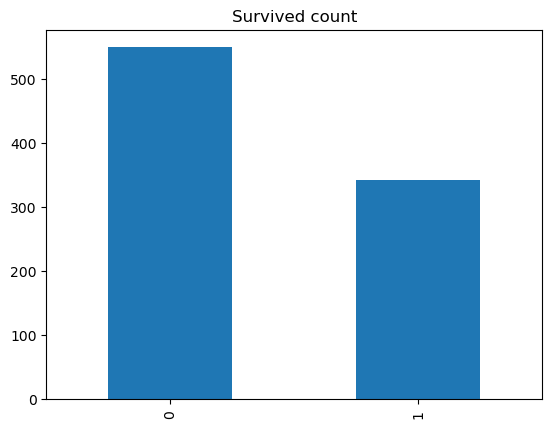

In [21]:
df_count1=df["Survived"].value_counts()
df_count1.plot.bar()
plt.title('Survived count')
plt.show()

#### 0이 사망 , 1이 생존으로 사망자가 약 550명, 생존자가 약 350명으로 대략적으로 알 수 있다. 데이터가 불균형 데이터라고 판단하고, 머신러닝까지 진행한다면 데이터도 적기때문에 언더 샘플링보다  smote기법을 통해 오버샘플링 해줄 것입니다.

# 목표변수 Survived 비율 : Pie 차트

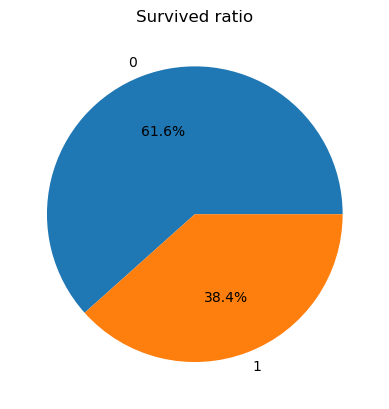

In [29]:
df_count2=df.groupby(["Survived"]).size()
df_count2.plot.pie(autopct='%1.1f%%')
plt.title('Survived ratio')
plt.show()

#### 비율을 보더라도 사망자가 생존자보다 많은 비율임을 알 수 있습니다. 오버샘플링 이후 pie차트를 한번 더 그려주면 50:50으로 되서 직관적으로 데이터 균형이 맞춰진 것을 볼 수 있을 것이라고 생각합니다.

# 범주형 변수 Pclass : Pie 차트

<Axes: title={'center': 'Pclass ratio'}>

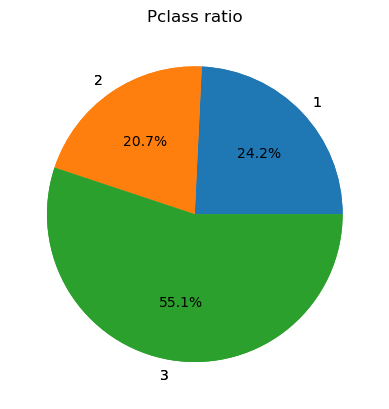

In [30]:
df_count3=df.groupby(["Pclass"]).size()
df_count3.plot.pie(autopct='%1.1f%%')
plt.title('Pclass ratio')
df_count3.plot.pie()

#### Pclass 변수의 3가지 클래스 중 3등석이 압도적으로 많은 것을 알 수 있습니다석 1등석과 2등석을 합쳐도 3등석이 매우 많습니다. 필요에 따라 3가지 클래스에 따라 생존과 사망 비율이 얼마나 다른지 분석해볼 수 있을 것 같다.

# 범주형 변수 Sex : Pie 차트

<Axes: title={'center': 'Sex ratio'}>

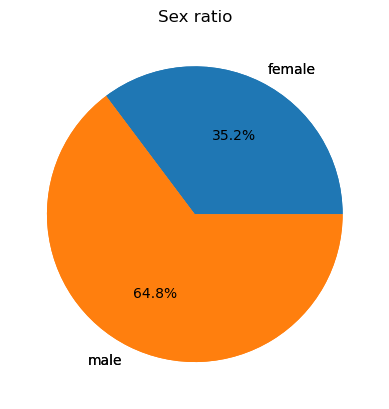

In [31]:
df_count4=df.groupby(["Sex"]).size()
df_count4.plot.pie(autopct='%1.1f%%')
plt.title('Sex ratio')
df_count4.plot.pie()

#### 타이타닉 데이터에서 성별은 남성이 여성에 비해 훨씬 많은 비율을 차지하고 있는 것을 알 수 있습니다. 

# 범주형 변수 Embarked : Pie 차트

<Axes: title={'center': 'Embarked ratio'}>

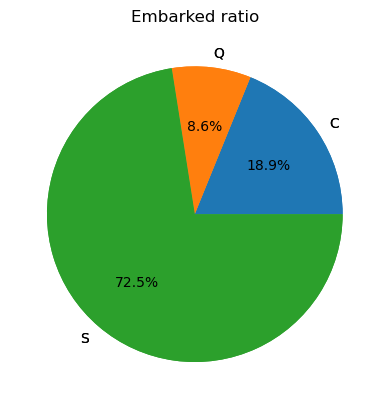

In [32]:
df_count5=df.groupby(["Embarked"]).size()
df_count5.plot.pie(autopct='%1.1f%%')
plt.title('Embarked ratio')
df_count5.plot.pie()

#### 승객이 탑승한 곳인 Embarked 변수에서는 약 75%의 사람이 Southampton에서 탑승한 사실을 알 수 있습니다.

# 연속형 변수 Age와 survived  비교 : histogram 

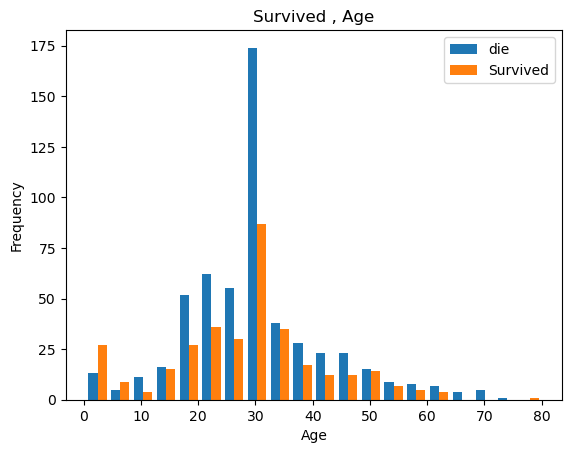

In [33]:
plt.hist([df[df['Survived'] == 0]['Age'], df[df['Survived'] == 1]['Age']],
         bins=20,label=['die', 'Survived'])

plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Survived , Age')
plt.legend()
plt.show()

#### 나이별로 생존과 사망을 비교해보니 어느정도 분포가 유사하다는 것을 알 수 있다. 30대가 가장 많이 죽기도 하고, 살기도 하였다 나이가 줄어들거나 나이가 많아짐에 따라 죽은 사람이 적다. 또한 0~10세전의 아이들은 비교적 많은 생존을 하였다.  많은 사람들이 사망했지만, 아이들을 많이 살리기 위한 노력을 했을 것 같다는 판단을 하였습니다.

# 범주형 변수 Sex와 Survived 생존의 관계  : Pie 차트

Text(0.5, 1.0, 'Survived, Sex')

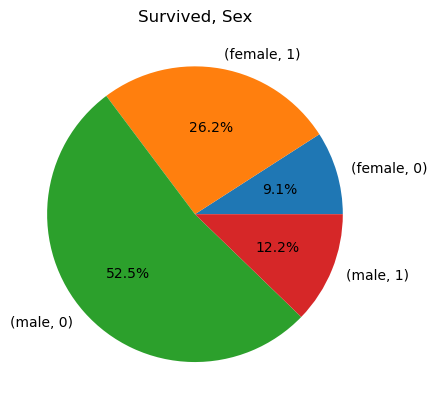

In [34]:
sex_survived = df.groupby(['Sex', 'Survived']).size()
sex_survived.plot.pie(autopct='%1.1f%%')
plt.title('Survived, Sex')

#### 성별과 생존의 관계를 살펴보면 남성의 사망비율이 52.5%  여성의 사망 비율 9.1%입니다.  남성이 압도적으로 많이 사망한 사실을 알 수 있습니다. 하지만 생존은 여성이 남성에 비해 거의 3배 비율 가까이했다는 것을 알 수 있습니다. 성별은 생존에 영향을 미치는 변수로 판단할 수 있습니다.

# 범주형 변수 Fare_group 과 Survived 생존관계

<Axes: xlabel='Fare_group', ylabel='count'>

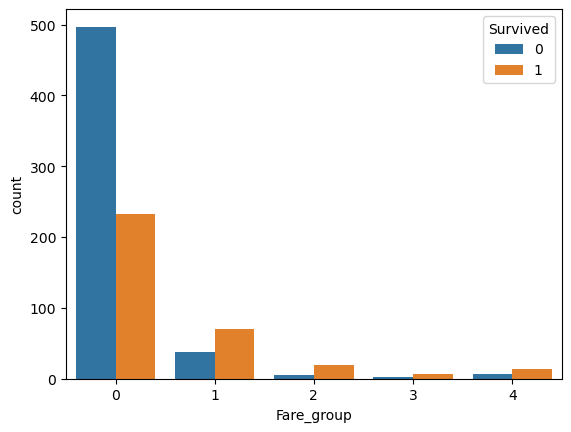

In [36]:
sns.countplot(x='Fare_group',hue='Survived', data=df)

#### 각각 생존과 Fare_group에 대한 각각 데이터 수로 Fare가 낮은 사람이 약 500명가까이 사망했고, 약 230명정도 생존했습니다. 구간 0에 대부분의 사람이 존재하고 0은 죽은 사람이 산사람보다 압도적으로 많습니다. 하지만 1,2,3,4 구간 즉 요금을 많이 내고 탄 사람들은 죽은 사람보다 산 사람이 더 많은 것을 알 수 있습니다. 돈이 많은 사람이 살 확률이 더 높았다고 생각할 수 있습니다.

# 자동차 연비에서 기술통계치 구하기

In [49]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from scipy import stats
from statsmodels.stats.proportion import proportions_ztest
%matplotlib inline

In [51]:
mycars=pd.read_csv("/home/piai/바탕화면/1 Big Data 분석 기초/mycars.csv", encoding='euc-kr')
mycars.head(10)

,manufacturer,model,displacement,year,cylinder,automatic,driving,mpg,highway_mileage,fuel,class
0,audi,a4,1.8,1999,4,auto,f,18,29,p,compact
1,audi,a4,1.8,1999,4,manual,f,21,29,p,compact
2,audi,a4,2.0,2008,4,manual,f,20,31,p,compact
3,audi,a4,2.0,2008,4,auto,f,21,30,p,compact
4,audi,a4,2.8,1999,6,auto,f,16,26,p,compact
5,audi,a4,2.8,1999,6,manual,f,18,26,p,compact
6,audi,a4,3.1,2008,6,auto,f,18,27,p,compact
7,audi,a4 quattro,1.8,1999,4,manual,4,18,26,p,compact
8,audi,a4 quattro,1.8,1999,4,auto,4,16,25,p,compact
9,audi,a4 quattro,2.0,2008,4,manual,4,20,28,p,compact


In [52]:
df1=mycars[['automatic','mpg']]
df1.groupby('automatic').describe()

mpg                                                  
           count       mean       std  min   25%   50%   75%   max
automatic                                                         
auto       157.0  15.968153  3.848777  9.0  13.0  16.0  18.0  29.0
manual      77.0  18.675325  4.488118  9.0  15.0  18.0  21.0  35.0

In [53]:
df2=mycars[['automatic','highway_mileage']]
df2.groupby('automatic').describe()

highway_mileage                                                   
                    count       mean       std   min   25%   50%   75%   max
automatic                                                                   
auto                157.0  22.292994  5.623054  12.0  17.0  22.0  26.0  41.0
manual               77.0  25.779221  5.961772  12.0  23.0  26.0  29.0  44.0

#### 시내에서의 연비와 고속도로에서의 연비의 두 통계치를 비교해보았습니다. 고속도로에서 운전할 때 연비가 자동,수동 모두 약 7정도  높게 나왔습니다.  시내에서의 연비와 고속도로에서의 연비의 표준편차를 비교해보면 고속도로에서의 연비가 더 높기 때문에 편차가 고속도로에서 더 심한 것을 알 수 있었습니다. 

# 합,누적합, 퍼센트, 누적 퍼센트 

In [54]:
mycars[['model','automatic']]

,model,automatic
0,a4,auto
1,a4,manual
2,a4,manual
3,a4,auto
4,a4,auto
...,...,...
229,passat,auto
230,passat,manual
231,passat,auto
232,passat,manual


In [55]:
count1=mycars[['model']].value_counts().sort_index()
print(count1)

model                 
4runner 4wd                6
a4                         7
a4 quattro                 8
a6 quattro                 3
altima                     6
c1500 suburban 2wd         5
camry                      7
camry solara               7
caravan 2wd               11
civic                      9
corolla                    5
corvette                   5
dakota pickup 4wd          9
durango 4wd                7
expedition 2wd             3
explorer 4wd               6
f150 pickup 4wd            7
forester awd               6
grand cherokee 4wd         8
grand prix                 5
gti                        5
impreza awd                8
jetta                      9
k1500 tahoe 4wd            4
land cruiser wagon 4wd     2
malibu                     5
maxima                     3
mountaineer 4wd            4
mustang                    9
navigator 2wd              3
new beetle                 6
passat                     7
pathfinder 4wd             4
ram 1500 pickup 4wd 

In [39]:
percent1= count1/sum(count1)*100

In [40]:
cumcnt1=np.cumsum(count1)
print(cumcnt1)

model                 
4runner 4wd                 6
a4                         13
a4 quattro                 21
a6 quattro                 24
altima                     30
c1500 suburban 2wd         35
camry                      42
camry solara               49
caravan 2wd                60
civic                      69
corolla                    74
corvette                   79
dakota pickup 4wd          88
durango 4wd                95
expedition 2wd             98
explorer 4wd              104
f150 pickup 4wd           111
forester awd              117
grand cherokee 4wd        125
grand prix                130
gti                       135
impreza awd               143
jetta                     152
k1500 tahoe 4wd           156
land cruiser wagon 4wd    158
malibu                    163
maxima                    166
mountaineer 4wd           170
mustang                   179
navigator 2wd             182
new beetle                188
passat                    195
pathfinder 4wd   

In [41]:
cumpct1=np.cumsum(percent1)

#### 모델을 기준으로 개수를 카운트하고 , 순서대로 정렬하여 출력하였다. 퍼센트는 총 개수에서 각각의 정렬된 모델의 개수를 나누고 100을 곱하여 구해줍니다. 누적합은 numpy에서 제공하는 cumsum함수를 통해 구해주고, 퍼센트도 동일하게 누적합 해줍니다. 

In [42]:
count_data1=pd.DataFrame({'Count':count1,'CumCnt':cumcnt1, 'Percent':percent1, 'CumPct':cumpct1})
count_data1.columns.name='model'
print(count_data1)


model                   Count  CumCnt   Percent      CumPct
model                                                      
4runner 4wd                 6       6  2.564103    2.564103
a4                          7      13  2.991453    5.555556
a4 quattro                  8      21  3.418803    8.974359
a6 quattro                  3      24  1.282051   10.256410
altima                      6      30  2.564103   12.820513
c1500 suburban 2wd          5      35  2.136752   14.957265
camry                       7      42  2.991453   17.948718
camry solara                7      49  2.991453   20.940171
caravan 2wd                11      60  4.700855   25.641026
civic                       9      69  3.846154   29.487179
corolla                     5      74  2.136752   31.623932
corvette                    5      79  2.136752   33.760684
dakota pickup 4wd           9      88  3.846154   37.606838
durango 4wd                 7      95  2.991453   40.598291
expedition 2wd              3      98  1

#### 데이터 프레임으로 모델별 개수, 누적합, 퍼센트, 퍼센트 누적합으로 만들어주고 출력해주었습니다. 모델을 보았을 때, 총 234대의 차량이 있고, 11대로 caravan 2wd가 데이터에서 가장 많은 차량이다.  모델별로 차량의 수는 분포가 비슷하다고 볼 수 있다.

In [56]:
count2=mycars[['automatic']].value_counts().sort_index()
print(count2)

automatic
auto         157
manual        77
dtype: int64


In [57]:
percent2= count2/sum(count2)*100

In [58]:
cumcnt2=np.cumsum(count2)
print(cumcnt2)

automatic
auto         157
manual       234
dtype: int64


In [59]:
cumpct2=np.cumsum(percent2)

In [60]:
count_data2=pd.DataFrame({'Count':count2,'CumCnt':cumcnt2, 'Percent':percent2, 'CumPct':cumpct2})
count_data2.columns.name='automatic'
print(count_data2)

automatic  Count  CumCnt    Percent      CumPct
automatic                                      
auto         157     157  67.094017   67.094017
manual        77     234  32.905983  100.000000


#### 차량 구동방식에 따라 기준으로 개수를 카운트하고 , 순서대로 정렬하여 출력하였다. 퍼센트는 총 개수에서 각각의 정렬된 모델의 개수를 나누고 100을 곱하여 구해줍니다. 누적합은 numpy에서 제공하는 cumsum함수를 통해 구해주고, 퍼센트도 동일하게 누적합 해줍니다. 
#### 차량은 157개의 자동 차량과 77개의 수동차량으로 자동차량이 데이터내에서 약 2배 더 많이 존재한다. 